In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression,LogisticRegression,ElasticNet
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Rainfall.csv")

In [17]:
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [18]:
df['Location']=le.fit_transform(df["Location"])
df['WindGustDir']=le.fit_transform(df["WindGustDir"])
df['WindDir9am']=le.fit_transform(df["WindDir9am"])
df['RainToday']=le.fit_transform(df["RainToday"])
df['RainTomorrow']=le.fit_transform(df["RainTomorrow"])

In [19]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.4,0.0,NaN,NaN,0,31.0,9,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
8421,2017-06-22,9,3.6,25.3,0.0,NaN,NaN,6,22.0,9,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
8422,2017-06-23,9,5.4,26.9,0.0,NaN,NaN,3,37.0,9,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
8423,2017-06-24,9,7.8,27.0,0.0,NaN,NaN,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [21]:
#Both columns are null that why dropped
df.drop(['Evaporation'],axis=1,inplace=True)
df.drop(['Sunshine'],axis=1,inplace=True)


In [22]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,13,44.0,13,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.1,0.0,14,44.0,6,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.7,0.0,15,46.0,13,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.0,0.0,4,24.0,9,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.3,1.0,13,41.0,1,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.4,0.0,0,31.0,9,ENE,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
8421,2017-06-22,9,3.6,25.3,0.0,6,22.0,9,N,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
8422,2017-06-23,9,5.4,26.9,0.0,3,37.0,9,WNW,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
8423,2017-06-24,9,7.8,27.0,0.0,9,28.0,10,N,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [23]:
df['WindDir3pm']=le.fit_transform(df["WindDir3pm"])
df['Date']=le.fit_transform(df["Date"])

In [24]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.4,0.0,0,31.0,9,1,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
8421,3000,9,3.6,25.3,0.0,6,22.0,9,3,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
8422,3001,9,5.4,26.9,0.0,3,37.0,9,14,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
8423,3002,9,7.8,27.0,0.0,9,28.0,10,3,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [27]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2999,9,2.8,23.4,0.0,0,31.0,9,1,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
8421,3000,9,3.6,25.3,0.0,6,22.0,9,3,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
8422,3001,9,5.4,26.9,0.0,3,37.0,9,14,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
8423,3002,9,7.8,27.0,0.0,9,28.0,10,3,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0
8424,3003,9,14.9,NaN,0.0,16,NaN,2,2,17.0,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,0,2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   int32  
 1   Location       8425 non-null   int32  
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   WindGustDir    8425 non-null   int32  
 6   WindGustSpeed  7434 non-null   float64
 7   WindDir9am     8425 non-null   int32  
 8   WindDir3pm     8425 non-null   int32  
 9   WindSpeed9am   8349 non-null   float64
 10  WindSpeed3pm   8318 non-null   float64
 11  Humidity9am    8366 non-null   float64
 12  Humidity3pm    8323 non-null   float64
 13  Pressure9am    7116 non-null   float64
 14  Pressure3pm    7113 non-null   float64
 15  Cloud9am       6004 non-null   float64
 16  Cloud3pm       5970 non-null   float64
 17  Temp9am        8369 non-null   float64
 18  Temp3pm 

In [29]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

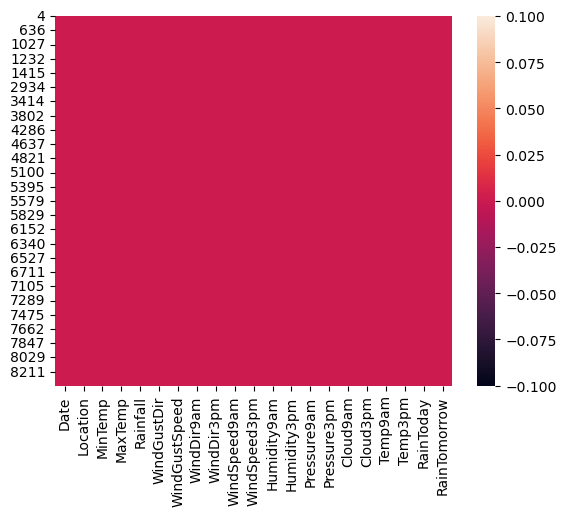

In [33]:
sns.heatmap(df.isnull())

In [34]:
df.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.586172,0.130709,0.196039,0.036130,0.006546,-0.013855,-0.068950,0.008768,-0.044976,...,0.058541,-0.030552,0.001942,-0.014869,0.004460,-0.040283,0.181047,0.204781,-0.010576,0.001166
Location,0.586172,1.000000,0.068113,0.111564,0.013128,0.005170,0.274238,-0.217267,0.095788,0.250479,...,-0.029561,-0.061896,0.031612,0.058168,0.036146,0.023705,0.085250,0.112375,0.005854,0.012056
MinTemp,0.130709,0.068113,1.000000,0.739226,0.080343,-0.191150,0.179146,-0.129052,-0.163833,0.116854,...,-0.111786,0.027444,-0.430479,-0.429017,0.087764,0.028409,0.869750,0.714295,0.006081,0.043278
MaxTemp,0.196039,0.111564,0.739226,1.000000,-0.113792,-0.292277,0.144508,-0.291308,-0.190698,0.074702,...,-0.453759,-0.457385,-0.324970,-0.410436,-0.343098,-0.328121,0.893351,0.978700,-0.290426,-0.207669
Rainfall,0.036130,0.013128,0.080343,-0.113792,1.000000,0.073941,0.104692,0.117446,0.052729,0.048944,...,0.296996,0.277014,-0.096060,-0.051201,0.213637,0.184167,-0.037008,-0.112956,0.489972,0.239263
WindGustDir,0.006546,0.005170,-0.191150,-0.292277,0.073941,1.000000,-0.050620,0.445583,0.553008,-0.114800,...,0.149678,0.169548,-0.108025,-0.010993,0.149612,0.120377,-0.222643,-0.309746,0.180545,0.082069
WindGustSpeed,-0.013855,0.274238,0.179146,0.144508,0.104692,-0.050620,1.000000,-0.234649,0.022320,0.675847,...,-0.237387,-0.123955,-0.370224,-0.336766,0.049279,0.119245,0.140435,0.106141,0.081286,0.208782
WindDir9am,-0.068950,-0.217267,-0.129052,-0.291308,0.117446,0.445583,-0.234649,1.000000,0.264739,-0.261802,...,0.206627,0.231456,0.038523,0.125664,0.133621,0.066963,-0.200837,-0.296746,0.203681,0.049152
WindDir3pm,0.008768,0.095788,-0.163833,-0.190698,0.052729,0.553008,0.022320,0.264739,1.000000,-0.016592,...,0.041690,0.035749,-0.126596,-0.032107,0.104655,0.065892,-0.180579,-0.206513,0.138075,0.035269
WindSpeed9am,-0.044976,0.250479,0.116854,0.074702,0.048944,-0.114800,0.675847,-0.261802,-0.016592,1.000000,...,-0.332444,-0.172871,-0.158850,-0.128921,0.002672,0.074499,0.080140,0.065197,0.019560,0.090545


<AxesSubplot:>

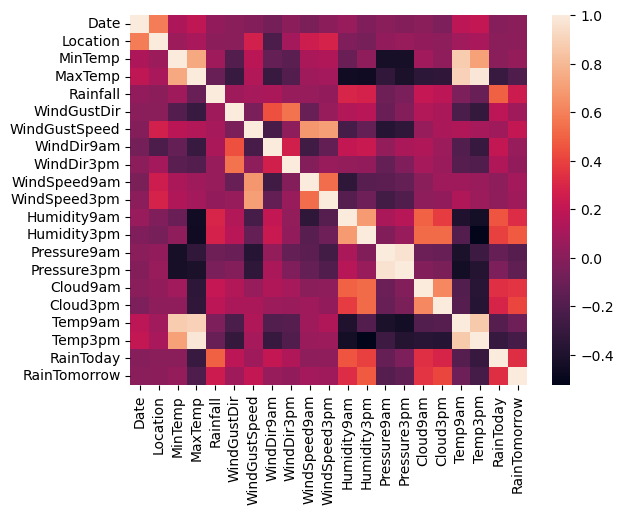

In [35]:
sns.heatmap(df.corr())

No negative correlation found in dataset(df)

In [36]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,...,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000
mean,1089.305285,5.661945,13.936892,24.104799,3.257294,7.470825,41.040169,7.730655,7.718605,15.893658,...,66.861522,52.579493,1017.530909,1015.151797,4.553066,4.532558,18.523214,22.619810,0.278858,0.299577
std,719.687965,2.891294,5.275244,6.180312,10.508559,4.807798,14.147550,4.871164,4.665202,9.696968,...,17.028134,18.571976,6.672315,6.635722,2.833476,2.719862,5.630948,6.021874,0.448485,0.485462
min,3.000000,1.000000,-1.300000,8.200000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,...,11.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,555.000000,3.000000,10.000000,19.800000,0.000000,3.000000,31.000000,3.000000,3.000000,9.000000,...,55.000000,40.000000,1013.100000,1010.400000,1.000000,2.000000,14.600000,18.400000,0.000000,0.000000
50%,950.000000,5.000000,14.000000,23.500000,0.000000,8.000000,39.000000,8.000000,8.000000,15.000000,...,67.000000,52.000000,1017.500000,1015.300000,5.000000,5.000000,18.400000,22.100000,0.000000,0.000000
75%,1357.750000,8.000000,18.000000,28.400000,1.800000,12.000000,50.000000,12.000000,12.000000,22.000000,...,79.000000,65.000000,1021.900000,1019.700000,7.000000,7.000000,22.800000,26.700000,1.000000,1.000000
max,3002.000000,11.000000,28.500000,43.600000,225.000000,15.000000,102.000000,16.000000,16.000000,63.000000,...,100.000000,99.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000,1.000000,2.000000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is difference in 75% and max

In [37]:
df.skew()

Date             0.988244
Location         0.152454
MinTemp         -0.070581
MaxTemp          0.266281
Rainfall         8.820463
WindGustDir     -0.073728
WindGustSpeed    0.680284
WindDir9am      -0.010062
WindDir3pm      -0.070949
WindSpeed9am     0.916121
WindSpeed3pm     0.341917
Humidity9am     -0.239206
Humidity3pm      0.090412
Pressure9am     -0.021389
Pressure3pm     -0.000189
Cloud9am        -0.304456
Cloud3pm        -0.254586
Temp9am         -0.016693
Temp3pm          0.274928
RainToday        0.986589
RainTomorrow     1.209637
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

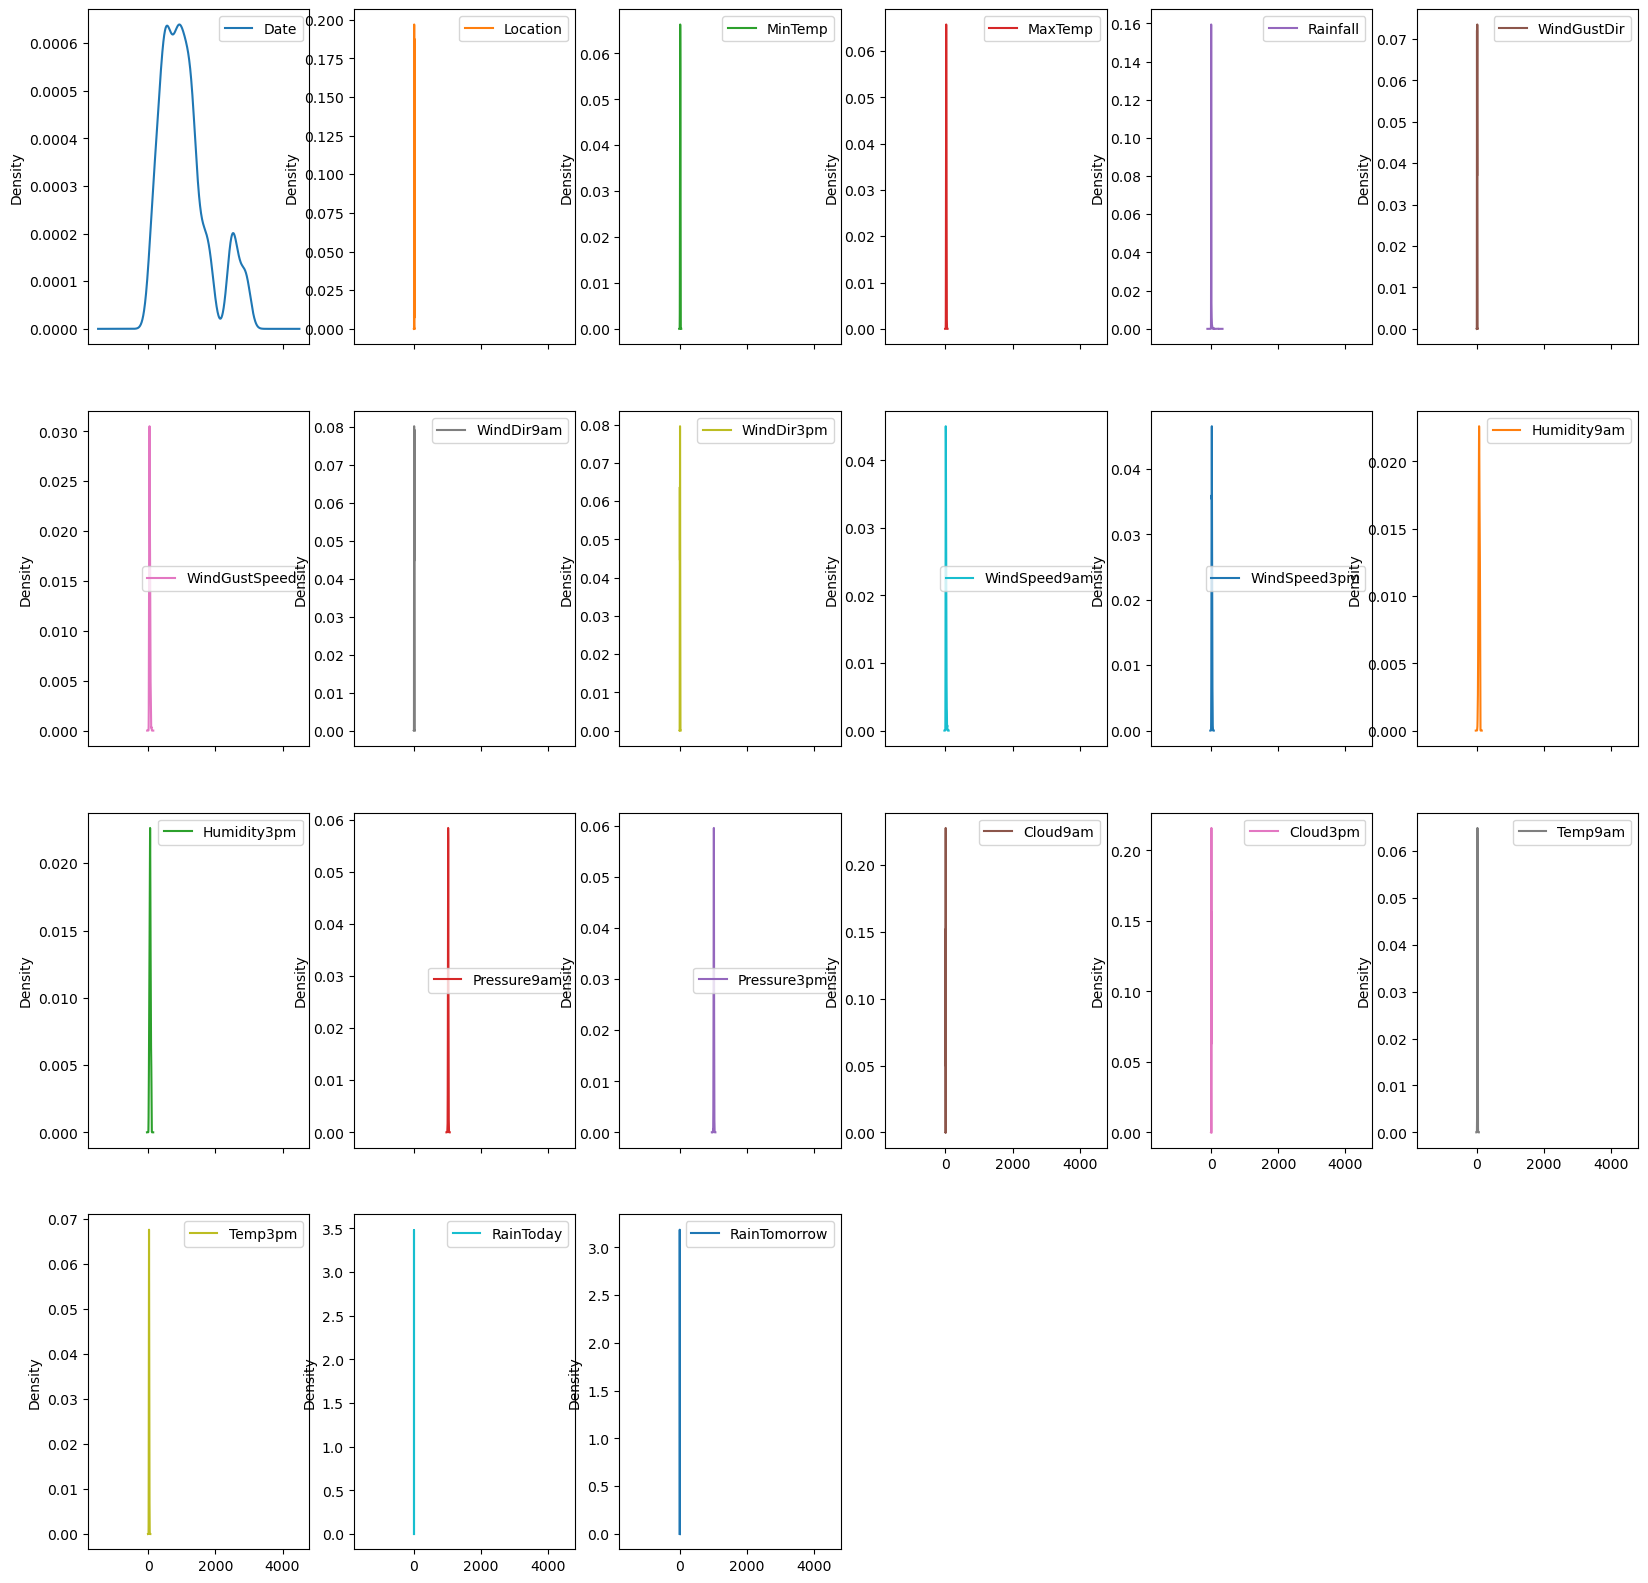

In [39]:
df.plot(kind="kde",subplots=True,layout=(4,6),figsize=(20,20))

No skewness is present in dataset(df)

Date                AxesSubplot(0.125,0.712609;0.110714x0.167391)
Location         AxesSubplot(0.257857,0.712609;0.110714x0.167391)
MinTemp          AxesSubplot(0.390714,0.712609;0.110714x0.167391)
MaxTemp          AxesSubplot(0.523571,0.712609;0.110714x0.167391)
Rainfall         AxesSubplot(0.656429,0.712609;0.110714x0.167391)
WindGustDir      AxesSubplot(0.789286,0.712609;0.110714x0.167391)
WindGustSpeed       AxesSubplot(0.125,0.511739;0.110714x0.167391)
WindDir9am       AxesSubplot(0.257857,0.511739;0.110714x0.167391)
WindDir3pm       AxesSubplot(0.390714,0.511739;0.110714x0.167391)
WindSpeed9am     AxesSubplot(0.523571,0.511739;0.110714x0.167391)
WindSpeed3pm     AxesSubplot(0.656429,0.511739;0.110714x0.167391)
Humidity9am      AxesSubplot(0.789286,0.511739;0.110714x0.167391)
Humidity3pm          AxesSubplot(0.125,0.31087;0.110714x0.167391)
Pressure9am       AxesSubplot(0.257857,0.31087;0.110714x0.167391)
Pressure3pm       AxesSubplot(0.390714,0.31087;0.110714x0.167391)
Cloud9am  

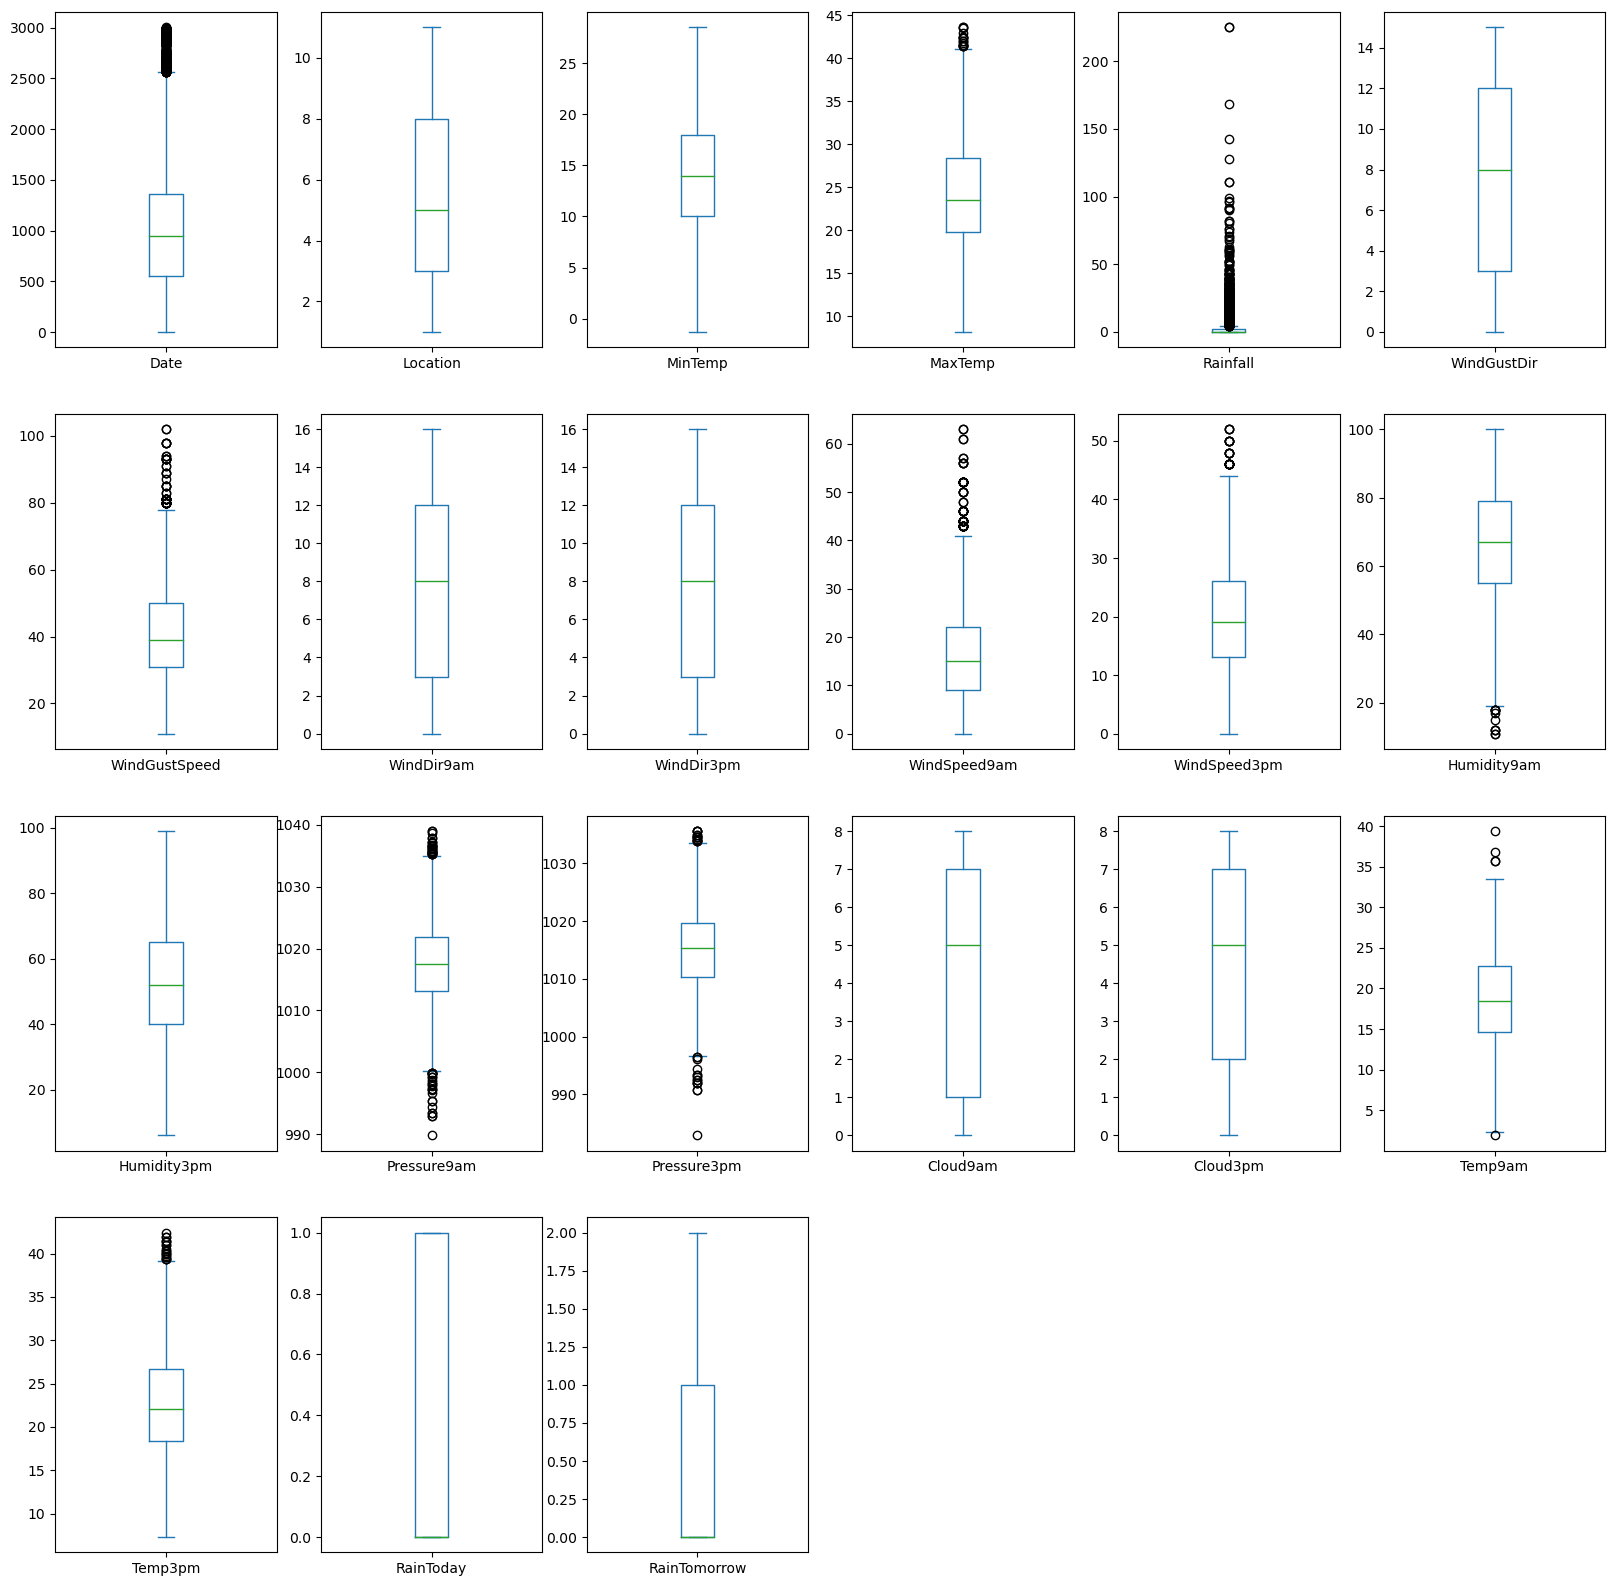

In [40]:
df.plot(kind="box",subplots=True,layout=(4,6),figsize=(20,20))

outliers is present in dataset(df)

In [41]:
from scipy.stats import zscore

In [42]:
z=np.abs(zscore(df))

In [43]:
z

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,1.508181,1.612578,0.675511,1.326158,0.214828,1.150165,0.002840,1.381881,0.154051,0.917256,...,0.889121,1.054361,1.008888,1.379317,0.863672,1.274994,0.128449,1.175870,0.621844,0.617162
11,1.498454,1.612578,0.372175,0.389148,0.100623,0.513975,0.709750,0.765946,1.440305,0.092168,...,1.300249,2.068954,1.053855,1.650605,1.216633,1.274994,0.465906,0.933331,1.608120,1.442949
12,1.497064,1.612578,0.372175,0.890793,1.174663,1.150165,1.410982,0.355323,0.368427,1.248599,...,0.536726,2.176655,3.482055,3.338617,1.216633,1.274994,0.199493,1.132626,1.608120,1.442949
16,1.491506,1.612578,0.030923,0.518605,0.309999,1.346044,1.345970,0.671234,1.654681,0.504712,...,0.125598,1.584302,0.799044,0.716169,1.216633,1.298938,0.235014,0.750645,0.621844,1.442949
17,1.490116,1.612578,0.082828,0.194962,1.288867,1.150165,1.552364,0.971258,1.346578,1.020391,...,0.771656,0.668848,1.758333,1.952036,1.216633,1.298938,0.092927,0.185977,1.608120,1.442949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,2.616264,1.154642,0.125715,0.355230,0.309999,0.110078,0.285604,0.671234,0.060324,0.320375,...,0.344262,0.892810,0.669867,0.519697,0.863672,1.298938,0.554710,0.395299,0.621844,0.617162
8394,2.617654,1.154642,0.068840,0.565598,0.271930,1.358182,0.144222,1.697791,0.154051,1.639207,...,0.066866,1.377462,0.445034,0.142909,0.195210,0.907290,0.430384,0.760673,0.621844,0.617162
8397,2.621823,1.154642,0.234496,0.308237,0.309999,1.554062,0.285604,1.587192,1.225930,0.320375,...,0.461727,1.000510,1.014611,0.986915,1.216633,1.274994,0.821123,0.269016,0.621844,0.617162
8398,2.623212,1.154642,0.860125,0.227326,0.309999,1.554062,0.426986,0.260611,1.654681,0.298440,...,0.285530,1.108211,1.359356,1.273274,1.216633,0.195824,1.194102,0.053114,0.621844,0.617162


In [44]:
threashold=3
print(np.where(z>3))

(array([   2,    2,    6,    6,   13,  106,  196,  196,  202,  213,  217,
        218,  273,  273,  279,  293,  322,  323,  323,  323,  345,  346,
        348,  472,  517,  551,  555,  578,  579,  670,  724,  725,  788,
        789,  790,  821,  828,  837,  842,  843,  851,  876,  883,  885,
        939,  960,  963,  977,  984, 1035, 1042, 1070, 1094, 1096, 1102,
       1143, 1160, 1166, 1180, 1189, 1194, 1195, 1203, 1228, 1235, 1237,
       1291, 1312, 1315, 1329, 1336, 1387, 1394, 1422, 1446, 1448, 1454,
       1495, 1512, 1518, 1532, 1532, 1568, 1570, 1619, 1619, 1639, 1651,
       1658, 1673, 1674, 1731, 1775, 1780, 1780, 1797, 1832, 1832, 1836,
       1848, 1848, 1848, 1849, 1853, 1872, 1876, 1879, 1879, 1904, 1920,
       1943, 1944, 1948, 1952, 1955, 1961, 2000, 2003, 2007, 2022, 2026,
       2028, 2034, 2039, 2044, 2044, 2047, 2057, 2058, 2058, 2059, 2059,
       2059, 2060, 2065, 2069, 2070, 2075, 2075, 2076, 2079, 2084, 2089,
       2089, 2091, 2093, 2094, 2095, 2103, 2111, 2

In [45]:
df_n=df[(z<3).all(axis=1)]

In [46]:
df_n.shape

(4499, 21)

In [47]:
df_n.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [48]:
df=df_n

In [72]:
df.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
11,11,1,15.9,21.7,2.2,5,31.0,4,1,15.0,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,1,1
16,16,1,14.1,20.9,0.0,1,22.0,11,0,11.0,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,0,1
17,17,1,13.5,22.9,16.8,13,63.0,3,14,6.0,...,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,1,1


prediction of Rain Today

In [51]:
x=df.iloc[:,0:-2]

In [52]:
x

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
4,4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
11,11,1,15.9,21.7,2.2,5,31.0,4,1,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0
16,16,1,14.1,20.9,0.0,1,22.0,11,0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1
17,17,1,13.5,22.9,16.8,13,63.0,3,14,6.0,20.0,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5
29,29,1,12.5,24.2,1.2,14,50.0,15,12,11.0,22.0,78.0,70.0,1005.6,1003.4,8.0,8.0,12.5,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,2972,9,14.6,26.3,0.0,8,37.0,11,8,19.0,20.0,61.0,36.0,1022.0,1018.6,7.0,1.0,15.4,25.0
8394,2973,9,14.3,27.6,0.4,14,39.0,16,7,0.0,20.0,68.0,27.0,1020.5,1016.1,4.0,7.0,16.1,27.2
8397,2976,9,12.7,22.2,0.0,0,37.0,0,2,19.0,13.0,59.0,34.0,1024.3,1021.7,8.0,8.0,13.9,21.0
8398,2977,9,9.4,22.7,0.0,0,35.0,9,0,13.0,17.0,62.0,32.0,1026.6,1023.6,8.0,4.0,11.8,22.3


In [53]:
y=df.iloc[:,-2]

In [54]:
y

4       0
11      1
16      0
17      1
29      1
       ..
8393    0
8394    0
8397    0
8398    0
8423    0
Name: RainToday, Length: 4499, dtype: int32

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.27,random_state=48)

In [57]:
xtrain.shape

(3284, 19)

In [58]:
ytrain.shape

(3284,)

In [60]:
lg=LogisticRegression()

In [61]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [62]:
lpred=lg.predict(xtest)

In [63]:
lg.score(xtrain,ytrain)

0.9823386114494519

In [64]:
print("Accuracy score",accuracy_score(ytest,lpred))
print("confusion matrix",confusion_matrix(ytest,lpred))
print("Classification report",classification_report(ytest,lpred))

Accuracy score 0.9818930041152263
confusion matrix [[888   7]
 [ 15 305]]
Classification report               precision    recall  f1-score   support

           0       0.98      0.99      0.99       895
           1       0.98      0.95      0.97       320

    accuracy                           0.98      1215
   macro avg       0.98      0.97      0.98      1215
weighted avg       0.98      0.98      0.98      1215



In [65]:
p=np.array([4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7])

In [66]:
p=p.reshape(1,-1)

In [67]:
lg.predict(p)

array([0])

Model is predicting the correct value of Rain Today 

hence this model is working fine for predicting  how much rainfall could be there.

Prediction for RainTomorrow

In [68]:
a=x

In [69]:
a

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
4,4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
11,11,1,15.9,21.7,2.2,5,31.0,4,1,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0
16,16,1,14.1,20.9,0.0,1,22.0,11,0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1
17,17,1,13.5,22.9,16.8,13,63.0,3,14,6.0,20.0,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5
29,29,1,12.5,24.2,1.2,14,50.0,15,12,11.0,22.0,78.0,70.0,1005.6,1003.4,8.0,8.0,12.5,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,2972,9,14.6,26.3,0.0,8,37.0,11,8,19.0,20.0,61.0,36.0,1022.0,1018.6,7.0,1.0,15.4,25.0
8394,2973,9,14.3,27.6,0.4,14,39.0,16,7,0.0,20.0,68.0,27.0,1020.5,1016.1,4.0,7.0,16.1,27.2
8397,2976,9,12.7,22.2,0.0,0,37.0,0,2,19.0,13.0,59.0,34.0,1024.3,1021.7,8.0,8.0,13.9,21.0
8398,2977,9,9.4,22.7,0.0,0,35.0,9,0,13.0,17.0,62.0,32.0,1026.6,1023.6,8.0,4.0,11.8,22.3


In [70]:
b=df["RainTomorrow"]

In [71]:
b

4       0
11      1
16      1
17      1
29      0
       ..
8393    0
8394    0
8397    0
8398    0
8423    0
Name: RainTomorrow, Length: 4499, dtype: int32

In [82]:
atrain,atest,btrain,btest=train_test_split(a,b,test_size=.35,random_state=46)

In [83]:
lg.fit(atrain,btrain)

LogisticRegression()

In [84]:
lg.score(atrain,btrain)

0.8331053351573188

In [85]:
lg_p=lg.predict(atest)

In [86]:
print("Accuracy score",accuracy_score(btest,lg_p))
print("confusion matrix",confusion_matrix(btest,lg_p))
print("Classification report",classification_report(btest,lg_p))

Accuracy score 0.846984126984127
confusion matrix [[1090   68]
 [ 173  244]]
Classification report               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1158
           1       0.78      0.59      0.67       417

    accuracy                           0.85      1575
   macro avg       0.82      0.76      0.78      1575
weighted avg       0.84      0.85      0.84      1575



In [89]:
p1=np.array([11,1,15.9,21.7,2.2,5,31.0,4,1,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0])

In [90]:
p1=p1.reshape(1,-1)

In [91]:
lg.predict(p1)

array([1])

Model is predicting the correct value of Rain Today

hence this model is working fine for predicting whether or not it will rain tomorrow.